# Predicitve Modelling for Hiring Decisions

This script analyzes a dataset of job applicants, where 'HiringDecision' is the target variable coded as 0 (not hired) and 1 (hired). Using various machine learning models including Logistic Regression, Decision Trees, and Random Forests, the project aims to predict applicant hiring outcomes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
applicants_df = pd.read_csv("recruitment_data.csv")

In [3]:
applicants_df.dropna(axis = 0, inplace = True)
print(applicants_df.head())

   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   26       1               2                0                  3   
1   39       1               4               12                  3   
2   48       0               2                3                  2   
3   34       1               2                5                  2   
4   30       0               1                6                  1   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            26.783828              48          78                91   
1            25.862694              35          68                80   
2             9.920805              20          67                13   
3             6.407751              36          27                70   
4            43.105343              23          52                85   

   RecruitmentStrategy  HiringDecision  
0                    1               1  
1                    2               1  
2                    2 

In [4]:
print(applicants_df.HiringDecision.value_counts())

HiringDecision
0    1035
1     465
Name: count, dtype: int64


In [5]:
from sklearn import preprocessing

x = applicants_df.drop('HiringDecision', axis=1)
y = np.asarray(applicants_df['HiringDecision'])

x = preprocessing.StandardScaler().fit(x).transform(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( 
        x, y, test_size = 0.3, random_state = 4)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1050, 10) (1050,)
Test set: (450, 10) (450,)


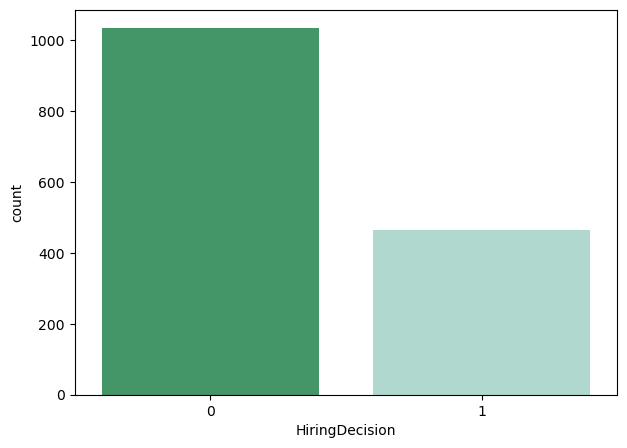

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7, 5))
sns.countplot(x='HiringDecision', data=applicants_df,
             palette="BuGn_r")
plt.show()

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy of the model is =', accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8422222222222222


#### Logistic regression model gave an accuracy = 84.22%. 
This is a starting reference for furthur improvements.

          Predicted:0  Predicted:1
Actual:0          281           26
Actual:1           45           98


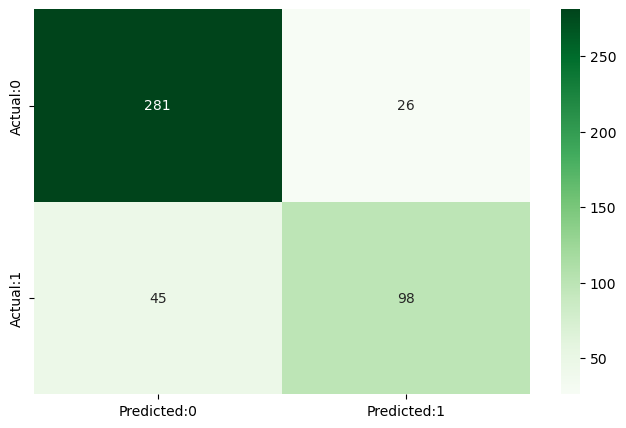

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       307
           1       0.79      0.69      0.73       143

    accuracy                           0.84       450
   macro avg       0.83      0.80      0.81       450
weighted avg       0.84      0.84      0.84       450



In [9]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
print(conf_matrix)

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

## Feature Selection using Recursive Feature Selection (RFE)

In [10]:
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg)
rfe.fit(x, y)
print(rfe.support_)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test) # eliminate the 'False' input variables from X, 'True' variables are the important features

[False False  True False False False  True  True  True  True]


In [11]:
X = applicants_df.drop(['HiringDecision', 'Age', 'Gender', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany'], axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1050, 5) (1050,)
Test set: (450, 5) (450,)


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
rfe_pred = logreg.predict(X_test)
print('Accuracy of the model is =', accuracy_score(y_test, rfe_pred))

Accuracy of the model is = 0.8444444444444444


#### Logistic regression model with RFE gave an accuracy = 84.44%
By using RFE, removed irrelavent features, and focused on the predictive features to give a slightly better accuracy.

## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
dtree_pred = dtree.predict(X_test)

In [15]:
print('Accuracy of the model is =', accuracy_score(y_test, dtree_pred))

Accuracy of the model is = 0.8133333333333334


#### Decision Tree algorithm gave an accuracy = 81.33%
it may have given a lower accuracy due to :

1) selection of a feature at each node is idependent of features as other nodes, but in this dataset the features may have a dependence on another leading to a lower accuracy.
2) If the decision tree to too deep (overfitting) or too shallow (underfitting), it can lead to low accuracy

I can increase accuracy by either changing the parameters of the decision tree to change its depth or a more improved model - random forest

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 800)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800)

In [17]:
rfc_pred = rfc.predict(X_test)

In [18]:
print('Accuracy of the model is =', accuracy_score(y_test, rfc_pred))

Accuracy of the model is = 0.8822222222222222


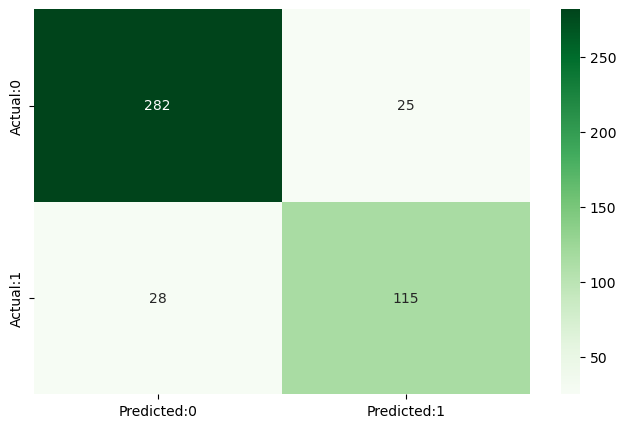

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       307
           1       0.82      0.80      0.81       143

    accuracy                           0.88       450
   macro avg       0.87      0.86      0.86       450
weighted avg       0.88      0.88      0.88       450



In [19]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, rfc_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, rfc_pred))

#### Random Forest algorithm gave an accuracy = 88%
Random Forest improved the previous model by combining multiple decision trees.

1. It can handle feature interaction better than decision tree.
2. Reduces the risk of overfitting.  

Accuracy of Random Forest can also be improved by improving parameters like changing no: of trees, depth of trees, etc